# Assignment 4 – Regression Using a Neural Network

## Dr. Sabah Sayed
## Ahmed Mohamed Sallam  20210614
## Omar Walid Ahmed 20201126
## Ahmed Alaa 20200029

### CS S1,2

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
%matplotlib inline

In [2]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
from sklearn.model_selection import train_test_split

In [3]:
data = pd.ExcelFile('concrete_data.xlsx')
print(data.sheet_names)
df = data.parse('concrete_data')

['concrete_data']


In [4]:
display(df.head())

,cement,water,superplasticizer,age,concrete_compressive_strength
0,540.0,162.0,2.5,28,79.99
1,540.0,162.0,2.5,28,61.89
2,332.5,228.0,0.0,270,40.27
3,332.5,228.0,0.0,365,41.05
4,198.6,192.0,0.0,360,44.30


In [5]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         700 non-null    float64
 1   water                          700 non-null    float64
 2   superplasticizer               700 non-null    float64
 3   age                            700 non-null    int64  
 4   concrete_compressive_strength  700 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 27.5 KB


None

           cement       water  superplasticizer         age  \
count  700.000000  700.000000        700.000000  700.000000   
mean   286.917286  178.059857          6.506857   49.010000   
std    101.379325   23.030158          6.289468   68.400978   
min    102.000000  121.800000          0.000000    3.000000   
25%    212.000000  159.500000          0.000000    7.000000   
50%    254.000000  178.500000          6.500000   28.000000   
75%    374.000000  192.000000         10.900000   56.000000   
max    540.000000  228.000000         32.200000  365.000000   

       concrete_compressive_strength  
count                     700.000000  
mean                       37.642514  
std                        17.607925  
min                         2.330000  
25%                        24.280000  
50%                        36.615000  
75%                        50.120000  
max                        82.600000  


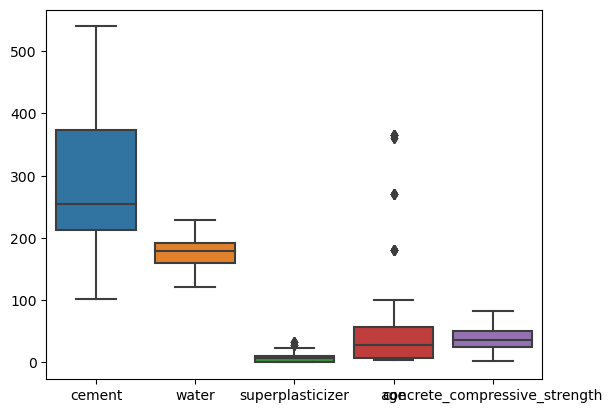

In [6]:
print(df.describe())
sns.boxplot(df)
plt.show()

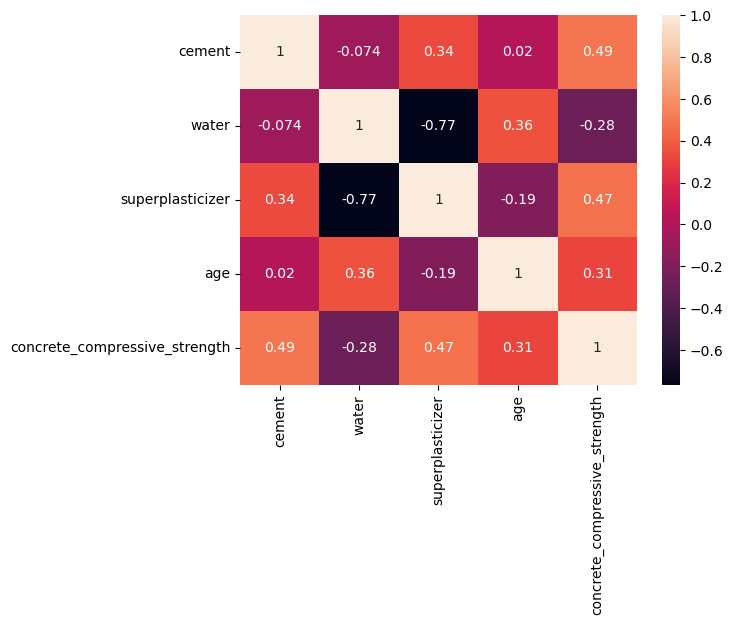

In [7]:
sns.heatmap(df.corr(numeric_only = True),annot=True)
plt.show()

In [8]:
features = df.iloc[:, :-1].values  # First four columns
target = df.iloc[:, -1].values  # Last column
features = (features - features.mean(axis=0)) / features.std(axis=0)

In [9]:
def train_test_split_manual(data, target, test_size=0.25, random_state=None):
    if random_state:
        np.random.seed(random_state)

    num_samples = len(data)
    indices = np.arange(num_samples)
    np.random.shuffle(indices)

    split_index = int((1 - test_size) * num_samples)

    train_indices, test_indices = indices[:split_index], indices[split_index:]
    X_train, X_test = data[train_indices], data[test_indices]
    y_train, y_test = target[train_indices], target[test_indices]

    return X_train, X_test, y_train, y_test

In [10]:
df = np.array([df])
X, X_test, y, y_test = train_test_split_manual(features, target, test_size=0.25, random_state=42)
print(X.shape, y.shape )
print(X[0],y[0])

(525, 4) (525,)
[1.50120807 0.34501806 0.73081336 0.10226459] 71.7


In [14]:
@staticmethod
def sigmoid(x):
    clipped_x = np.clip(x, -700, 700)
    return 1 / (1 + np.exp(-clipped_x))
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate, epochs):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        self.epochs = epochs

        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size) 
        self.bias_hidden = np.zeros((1, self.hidden_size))
        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size)
        self.bias_output = np.zeros((1, self.output_size))

    def train(self, X, y):
        for epoch in range(self.epochs):
            # Forward pass
            hidden_layer_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
            hidden_layer_output = sigmoid(hidden_layer_input)  # Sigmoid activation
            output_layer_input = np.dot(hidden_layer_output, self.weights_hidden_output) + self.bias_output
            predicted_output = output_layer_input  # Linear activation for regression
        
            # Compute loss (mean squared error)
            loss = np.mean((predicted_output - y.reshape(-1, 1))**2)
        
            # Backward pass
            output_error = predicted_output - y.reshape(-1, 1)
            hidden_error = np.dot(output_error, self.weights_hidden_output.T) * hidden_layer_output * (1 - hidden_layer_output)
        
            # Update weights and biases
            self.weights_hidden_output -= learning_rate * np.dot(hidden_layer_output.T, output_error)
            self.bias_output -= learning_rate * np.sum(output_error, axis=0, keepdims=True)
            self.weights_input_hidden -= learning_rate * np.dot(X.T, hidden_error)
            self.bias_hidden -= learning_rate * np.sum(hidden_error, axis=0, keepdims=True)
            r_squared = self.calculate_r_squared(self.predict(X), y)
            
            # Print loss every 100 epochs
            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss}")


    def predict(self, X):
        hidden_layer_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        hidden_layer_output = 1 / (1 + np.exp(-hidden_layer_input))
        output_layer_input = np.dot(hidden_layer_output, self.weights_hidden_output) + self.bias_output
        predicted_output = output_layer_input
        return predicted_output.flatten()


    def calculate_error(self, X, y):
        predictions = self.predict(X)
        error = np.mean((predictions - y) ** 2)
        return error
    
    def calculate_r_squared(self, y_true, y_pred):
        ss_total = np.sum((y_true - np.mean(y_true))**2)
        ss_residual = np.sum((y_true - y_pred)**2)
        r2 = 1 - (ss_residual / ss_total)
        return r2

In [15]:
input_size = X.shape[1]
hidden_size = 15  # You can adjust this based on experimentation
output_size = 1
learning_rate = 0.0001
epochs = 1000

In [16]:
nn = NeuralNetwork(input_size, hidden_size, output_size, learning_rate, epochs)
nn.train(X, y)

Epoch 0, Loss: 1672.5308148271624
Epoch 100, Loss: 68.97260802425042
Epoch 200, Loss: 60.22171075593067
Epoch 300, Loss: 57.25794048770516
Epoch 400, Loss: 55.76604719075153
Epoch 500, Loss: 54.806744753839254
Epoch 600, Loss: 53.99218565929864
Epoch 700, Loss: 53.08098087499655
Epoch 800, Loss: 52.22810894476873
Epoch 900, Loss: 51.330959887858704


In [19]:
test_error = nn.calculate_error(X_test, y_test)
print(f'Test Error: {test_error}')
predicted = nn.predict(X_test) 
print(predicted.shape, y_test.shape)
print(nn.calculate_r_squared(predicted,y_test))

# Example prediction for a new data point
new_data_point = np.array([[540, 162, 2.5, 28]])  # Replace with your values
predicted_strength = nn.predict(new_data_point)
print(f'Predicted Strength for New Data Point: {predicted_strength}')

Test Error: 55.454776116697964
(175,) (175,)
0.7626124720152756
Predicted Strength for New Data Point: [59.3180827]


# Feedforward neural network using TensorFlow

In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import Callback

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X.shape[1],)),
    tf.keras.layers.Dense(units=8, activation='sigmoid'),  # Hidden layer with sigmoid activation
    tf.keras.layers.Dense(units=1)  # Output layer (linear activation for regression)
])

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Define a custom callback to print every 100 epochs
class PrintEveryNthEpoch(Callback):
    def __init__(self, print_frequency=100):
        self.print_frequency = print_frequency

    def on_epoch_end(self, epoch, logs=None):
        if epoch % self.print_frequency == 0:
            print(f'Epoch {epoch}, Loss: {logs["loss"]}')

# Assuming X and y are your input data and labels
model.fit(X, y, epochs=1000, batch_size=32, verbose=0, callbacks=[PrintEveryNthEpoch(100)])

In [ ]:
train_loss = model.evaluate(X, y, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)

print(f"Training Loss: {train_loss}")
print(f"Testing Loss: {test_loss}")